# OBMEP: O INFERNO
## Projeto Final - Algoritmos Genéticos
_________________________________________________________________________________________________________________

## Instituição:
- Centro Nacional de Pesquisa em Energia e Materiais
- Ilum - Escola de Ciência

## Alunos:
- Gabriela Fajtag
- Laís Ruela
- João Pedro Mariano

## Professor:
- Daniel Cassar
_________________________________________________________________________________________________________________

### Introdução

Neste trabalho, apresentaremos um problema de matemática recreativa, desenvolvido pelo nosso grupo, que se inspira em questões de olimpíadas e competições matemáticas, como a OBMEP. Diferentemente dos problemas tradicionais, este será de um nível de dificuldade exponencialmente aumentado, com o intuito de ser analisado e resolvido de forma computacional.

A ideia principal do trabalho é utilizar este problema para testar diferentes operadores de mutação e analisar seus resultados, entendendo como cada operador influencia a eficiência do algoritmo genético em encontrar soluções ótimas.

#### O problema:

Distribua $n^2$ números distintos ($1,2,3,...n^2$) em uma matriz $n \times n$ 

Utilize a operação chamada **SIMPATIZAR**.
Nessa operação, temos que dada uma matriz $A$ de tamanho $n \times n$, definimos que:

* $ P_{linha}(i) $ é o produto de todos os elementos na $i$-ésima linha
* $ P_{coluna}(j) $ é o produto de todos os elementos na $j$-ésima coluna

A operação simpatizar é definida como:

$S = \sum_{i=1}^n P_{linha}(i) + \sum_{j=1}^n P_{coluna}(j)$

em que $S$ é o simpatizante.


Chamaremos a matriz de **simpática-rainha** caso, para os números escolhidos, ela **maximize o simpatizante**

#### Exemplo 

Escolhendo $n = 2$, utilizaremos os números $1,2,3,4$ e iremos organizá-los em uma matriz $2 \times 2$. 
Podemos fazer isso da seguinter forma:

$ A_1 = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} $

Vamos simpatizar a matriz $A_1$: <br>
$P_{linha}$: $1 \cdot2 + 3 \cdot4 = 2 + 12 = 14$ <br>
$P_{coluna}$: $1 \cdot3 + 2 \cdot4 = 3 + 8 = 11$

Logo $S_{A_1} = 14 + 11 = 25$

-----

Vamos alterar um pouco nossa matriz:

$ A_2 = \begin{pmatrix} 2 & 1 \\ 3 & 4 \end{pmatrix} $

Vamos simpatizar a matriz $A_2$: <br>
$P_{linha}$: $2 \cdot1 + 3 \cdot4 = 2 + 12 = 14$ <br>
$P_{coluna}$: $2\cdot3 + 1 \cdot4 = 6 + 4 = 12$

Logo $S_{A_2} = 14 + 10 = 24$

-----

Ao invés de continuar simpatizando matrizes, vamos automatizar esse processo no python, usando a biblioteca `itertools` para gerar todas as permutações de $1,2,3,4$.

In [1]:
import itertools

#MATRIZ = [[a, b], [c, d]]

# Função para calcular S para uma matriz 2x2
def calculo_S(matrix):
    P_linha = (matrix[0][0] * matrix[0][1]) + (matrix[1][0] * matrix[1][1])
    P_coluna = (matrix[0][0] * matrix[1][0]) + (matrix[0][1] * matrix[1][1])
    return P_linha + P_coluna

# Gerar todas as permutações dos números 1, 2, 3, 4
numeros = [1, 2, 3, 4]
permutacoes = list(itertools.permutations(numeros))

# Lista para armazenar os resultados
resultados = []

# Calcular S para cada permutação organizada como uma matriz 2x2
for permutacao in permutacoes:
    matrix = [[permutacao[0], permutacao[1]], [permutacao[2], permutacao[3]]]
    S = calculo_S(matrix)
    resultados.append((matrix, S))

# Encontrar a matriz com o valor máximo de S
max_S = max(resultados, key=lambda x: x[1])

# Exibir os resultados
for matrix, S in resultados:
    print(f"Matriz:\n{matrix[0]}\n{matrix[1]}\nS = {S}\n")

print(f"Matriz com S máximo:\n{max_S[0][0]}\n{max_S[0][1]}\nS = {max_S[1]}")


Matriz:
[1, 2]
[3, 4]
S = 25

Matriz:
[1, 2]
[4, 3]
S = 24

Matriz:
[1, 3]
[2, 4]
S = 25

Matriz:
[1, 3]
[4, 2]
S = 21

Matriz:
[1, 4]
[2, 3]
S = 24

Matriz:
[1, 4]
[3, 2]
S = 21

Matriz:
[2, 1]
[3, 4]
S = 24

Matriz:
[2, 1]
[4, 3]
S = 25

Matriz:
[2, 3]
[1, 4]
S = 24

Matriz:
[2, 3]
[4, 1]
S = 21

Matriz:
[2, 4]
[1, 3]
S = 25

Matriz:
[2, 4]
[3, 1]
S = 21

Matriz:
[3, 1]
[2, 4]
S = 21

Matriz:
[3, 1]
[4, 2]
S = 25

Matriz:
[3, 2]
[1, 4]
S = 21

Matriz:
[3, 2]
[4, 1]
S = 24

Matriz:
[3, 4]
[1, 2]
S = 25

Matriz:
[3, 4]
[2, 1]
S = 24

Matriz:
[4, 1]
[2, 3]
S = 21

Matriz:
[4, 1]
[3, 2]
S = 24

Matriz:
[4, 2]
[1, 3]
S = 21

Matriz:
[4, 2]
[3, 1]
S = 25

Matriz:
[4, 3]
[1, 2]
S = 24

Matriz:
[4, 3]
[2, 1]
S = 25

Matriz com S máximo:
[1, 2]
[3, 4]
S = 25


Portanto, a matriz simpática-rainha tem simpatizante $S=25$

### Algoritmo Genético

Vamos modelar o nosso problema a fim de criar um algoritmo genético que busca a matriz simpática-rainha. Para isso, precisamos implementar as seguintes etapas:

* População: Criação de uma população inicial (e aleatória) de matrizes
* Função de fitness: Avaliar o valor do simpatizante (S) para uma matriz dada.
* Seleção: Selecionaremos matrizes por torneio para o cruzamento
* Cruzamento (Crossover): Combinar duas matrizes para criar novas matrizes (filhos).
* Mutação (Mutation): Nessa etapa, testaremos 4 operadores de mutação diferentes a fim de descobrir qual melhor se aplica para o nosso problema.
* Hall da Fama: Manter a melhor matriz encontrada durante as gerações.

## Import das bibliotecas e funções

In [2]:
import random
import numpy as np

from pprint import pprint
from funcoes import cria_candidato as cria_candidato
from funcoes import populacao as cria_populacao
from funcoes import calcular_fitness_populacao as funcao_objetivo
from funcoes import selecao_torneio_max as funcao_selecao
from funcoes import ponto_simples_correcao as funcao_cruzamento
from funcoes import mutacao_troca as mutacao_troca1
from funcoes import mutacao_troca2 as mutacao_troca2
from funcoes import mutacao_permuta_linhas as mutacao_permuta
from funcoes import mutacao_inverte_linhas as mutacao_inverte

## Criando o algoritmo genético

In [3]:
# Parâmetros

TAMANHO_POPULACAO = 150
CHANCE_DE_CRUZAMENTO = 0.95
CHANCE_DE_MUTACAO = 0.1
TAMANHO_TORNEIO = 5
NUMERO_GERACOES = 500
ORDEM_DA_MATRIZ = 4

In [4]:
def algoritmo_genetico(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO):
   
    hall_da_fama =[]
    
    # Criando população
    populacao = cria_populacao(TAMANHO_POPULACAO, ORDEM_DA_MATRIZ)
    
    for geracao in range(NUMERO_GERACOES):
        
        # Avaliando a população
        valores_fitness = funcao_objetivo(populacao)
        
        #hall da fama
        melhor_fitness = max(valores_fitness)
        melhor_individuo = populacao[valores_fitness.index(melhor_fitness)]
        hall_da_fama.append(melhor_individuo)
        
        # Seleção
        selecionados = funcao_selecao(populacao, valores_fitness, TAMANHO_TORNEIO)
        
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
    

        # Substituindo a população pela nova geração
        populacao = proxima_geracao
            
        # Mutação: vamos usar todos, depois descobrireremos o melhor!
        mutacao_troca1(populacao, CHANCE_DE_MUTACAO)
        mutacao_troca2(populacao, CHANCE_DE_MUTACAO)
        mutacao_permuta(populacao, CHANCE_DE_MUTACAO)
        mutacao_inverte(populacao, CHANCE_DE_MUTACAO)

        if geracao % 100  == 0: # de quanto em quanto mostramos a evolução
            print(f"Geração {geracao}: Melhor S = {melhor_fitness}")
            print(melhor_individuo)
        
    # Melhor indivíduo ao final de todas as gerações
    valores_fitness = funcao_objetivo(hall_da_fama)
    melhor_fitness_final = max(valores_fitness)
    melhor_individuo_final = hall_da_fama[valores_fitness.index(melhor_fitness_final)]
    
    print(f"Melhor S final = {melhor_fitness_final}")
    print(f"{melhor_individuo_final}")
    
    return(melhor_fitness_final)

In [5]:
algoritmo_genetico(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO)

Geração 0: Melhor S = 55372
[[ 7 11  1 16]
 [ 8 12 10 15]
 [ 2  6  3  9]
 [13  5  4 14]]
Geração 100: Melhor S = 76530
[[13 14 16 15]
 [ 2  6 11  1]
 [ 5  9 12  7]
 [ 3  8 10  4]]
Geração 200: Melhor S = 76530
[[13 14 16 15]
 [ 2  6 11  1]
 [ 5  9 12  7]
 [ 3  8 10  4]]
Geração 300: Melhor S = 76530
[[13 14 16 15]
 [ 2  6 11  1]
 [ 5  9 12  7]
 [ 3  8 10  4]]
Geração 400: Melhor S = 76530
[[13 14 16 15]
 [ 2  6 11  1]
 [ 5  9 12  7]
 [ 3  8 10  4]]
Melhor S final = 76530
[[13 14 16 15]
 [ 2  6 11  1]
 [ 5  9 12  7]
 [ 3  8 10  4]]


76530

#### Reflexões sobre o exercício

Com a proposta do problema e os resultados obtidos até agora, podemos fazer algumas reflexões importantes.

* Dado um determinado \( n \), de quantas maneiras distintas podemos organizar nossa matriz?
A resposta a essa pergunta é uma aplicação direta de um conceito básico da matemática: o fatorial. Para uma matriz \( n \times n \), podemos organizá-la de acordo com as condições do exercício de \( (n^2)! \) formas! É interessante refletirmos sobre isso, pois à medida que aumentamos o valor de \( n \), torna-se exponencialmente mais difícil encontrar uma disposição que maximize o simpatizante. Esse aumento de complexidade justifica a necessidade de utilizarmos técnicas computacionais para resolver o problema de forma eficiente.   

* Como a simetria influencia na operação de simpatizar? É interessante observar que realizar permutações entre linhas ou colunas de uma matriz não afeta o valor do simpatizante. Em outras palavras, a simetria das permutações é preservada no processo de simpatização. Essa propriedade simplifica a análise do problema e sugere que soluções equivalentes, em termos de disposição dos elementos na matriz, podem ser consideradas iguais em relação ao simpatizante.

_________________________________________________________________________________________________________________
## Comparando operadores de Mutação

Ao longo deste trabalho, desenvolvemos vários operadores de mutação. Os operadores de mutação são úteis para expandir nosso espaço de busca e nos ajudar a escapar de mínimos e máximos locais.

Vamos analisar cada um dos operadores criados e como eles influenciam a convergência do problema. Primeiro, observaremos o desempenho de cada operador individualmente, executando 500 gerações em 100 execuções distintas. Ao final de cada uma das 500 gerações, registraremos a simpática-rainha dessa série de gerações e seu respectivo valor simpatizante.

Após essa análise individual, testaremos todos os operadores de mutação simultaneamente, avaliando como a combinação deles afeta a convergência e os resultados finais.

### Operador de troca 1

Este operador avalia cada indivíduo (matriz) na população para determinar se ocorrerá uma mutação. A mutação ocorre com uma certa probabilidade (`chance_de_mutacao`) definida pelo usuário.

Quando a mutação é realizada em um indivíduo, ela consiste na troca de dois elementos diferentes da matriz. O processo de mutação de troca funciona da seguinte forma:

* Para cada indivíduo na população, convertemos a matriz em uma lista unidimensional.
* Geramos dois índices aleatórios para selecionar dois elementos distintos dessa lista.
* Troca-se os elementos nos índices selecionados.
* A lista é convertida de volta para a forma de matriz.

In [6]:
def algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO):
   
    hall_da_fama =[]
    
    # Criando população
    populacao = cria_populacao(TAMANHO_POPULACAO, ORDEM_DA_MATRIZ)
    
    for geracao in range(NUMERO_GERACOES):
        
        # Avaliando a população
        valores_fitness = funcao_objetivo(populacao)
        
        #hall da fama
        melhor_fitness = max(valores_fitness)
        melhor_individuo = populacao[valores_fitness.index(melhor_fitness)]
        hall_da_fama.append(melhor_individuo)
        
        # Seleção
        selecionados = funcao_selecao(populacao, valores_fitness, TAMANHO_TORNEIO)
        
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
    

        # Substituindo a população pela nova geração
        populacao = proxima_geracao
            
        # Mutação: vamos usar todos, depois descobrireremos o melhor!
        mutacao_troca1(populacao, CHANCE_DE_MUTACAO)
        #mutacao_troca2(populacao, CHANCE_DE_MUTACAO)
        #mutacao_permuta(populacao, CHANCE_DE_MUTACAO)
        #mutacao_inverte(populacao, CHANCE_DE_MUTACAO)

    # Melhor indivíduo ao final de todas as gerações
    valores_fitness = funcao_objetivo(hall_da_fama)
    melhor_fitness_final = max(valores_fitness)
    melhor_individuo_final = hall_da_fama[valores_fitness.index(melhor_fitness_final)]
    
    print(f"Melhor S final = {melhor_fitness_final}")
    print(f"{melhor_individuo_final}")
    
    return(melhor_fitness_final)

In [7]:
lista_simpatizantes_maximos = []
for _ in range(100):
    simpatizante_maximo = algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO)
    lista_simpatizantes_maximos.append(simpatizante_maximo)

Melhor S final = 70944
[[14  5  2  8]
 [15  4 10  7]
 [16 13  9 11]
 [12  1  3  6]]
Melhor S final = 76748
[[ 6  2 10  9]
 [14 13 16 15]
 [ 5  4 12  7]
 [ 3  1 11  8]]
Melhor S final = 74551
[[16  9 12 11]
 [15  7 10  4]
 [13  1  5  2]
 [14  3  8  6]]
Melhor S final = 75459
[[ 8  4  3 14]
 [ 7  2  1 15]
 [12  9 11 16]
 [10  6  5 13]]
Melhor S final = 75236
[[ 4 10  3  6]
 [15 16 14 13]
 [ 1 11  5  2]
 [ 7 12  9  8]]
Melhor S final = 74610
[[13  1  4  2]
 [15  9  6  7]
 [14  8  3  5]
 [16 11 12 10]]
Melhor S final = 75476
[[14  4  8  3]
 [15 10 11 12]
 [13  1  6  2]
 [16  5  9  7]]
Melhor S final = 71176
[[12  6  4  5]
 [14  8  1  2]
 [13 10  3  7]
 [16 15  9 11]]
Melhor S final = 75244
[[ 2  6  8 11]
 [13 16 14 15]
 [ 5  4  9 12]
 [ 1  3  7 10]]
Melhor S final = 72202
[[ 5  4 11  6]
 [ 1  9 10  8]
 [ 2  7 12  3]
 [13 16 15 14]]
Melhor S final = 74082
[[15 12 16 13]
 [ 7  9 14  8]
 [ 4  5 10  2]
 [ 6  3 11  1]]
Melhor S final = 73486
[[14 13 16 15]
 [ 6  1  8  4]
 [10  2  9  3]
 [11  5 

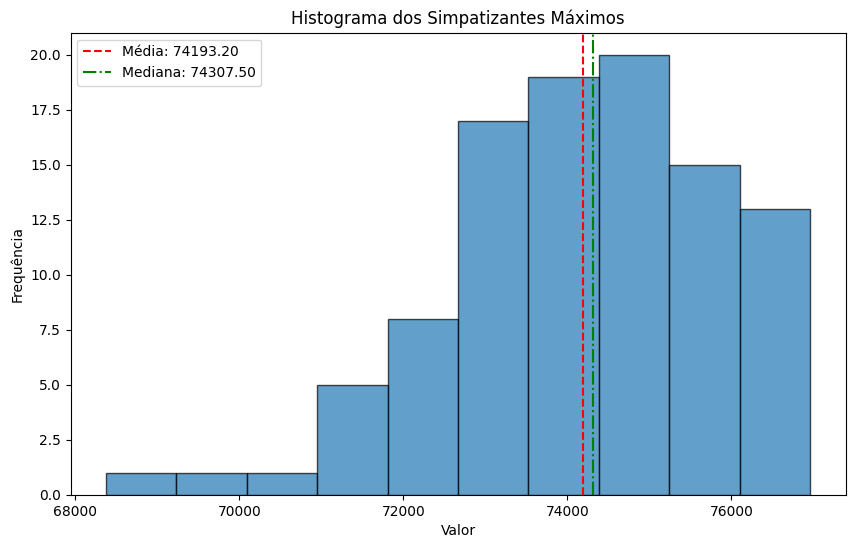

In [8]:
import matplotlib.pyplot as plt
# Calculando a média e a mediana
media = sum(lista_simpatizantes_maximos) / len(lista_simpatizantes_maximos)
mediana = sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2] if len(lista_simpatizantes_maximos) % 2 == 1 else (sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2 - 1] + sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2]) / 2

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(lista_simpatizantes_maximos, bins=10, edgecolor='black', alpha=0.7)

# Adicionando linhas verticais para a média e a mediana
plt.axvline(x=media, color='r', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='g', linestyle='-.', label=f'Mediana: {mediana:.2f}')

# Adicionando título e legendas
plt.title('Histograma dos Simpatizantes Máximos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

In [9]:
print(f"A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a {max(lista_simpatizantes_maximos)}.")

A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a 76962.


### Operador de troca 2

Este operador de mutação é diferente do anterior, pois avalia a probabilidade de mutação para cada gene individualmente, em vez de avaliar a mutação para o indivíduo como um todo. A mutação ocorre com uma certa probabilidade (`chance_de_mutacao`) definida pelo usuário.

Quando a mutação é realizada em um gene, ela consiste na troca desse gene com outro gene aleatório da matriz. O processo de mutação de troca por gene funciona da seguinte forma:

* Para cada indivíduo na população, convertemos a matriz em uma lista unidimensional.
* Para cada gene na lista, verificamos se ocorrerá mutação com base na `chance_de_mutacao`.
* Se a mutação ocorrer para um gene, selecionamos um índice aleatório para trocar o gene atual com outro gene da lista, garantindo que os índices sejam diferentes.
* A lista é convertida de volta para a forma de matriz.

In [10]:
def algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO):
   
    hall_da_fama =[]
    
    # Criando população
    populacao = cria_populacao(TAMANHO_POPULACAO, ORDEM_DA_MATRIZ)
    
    for geracao in range(NUMERO_GERACOES):
        
        # Avaliando a população
        valores_fitness = funcao_objetivo(populacao)
        
        #hall da fama
        melhor_fitness = max(valores_fitness)
        melhor_individuo = populacao[valores_fitness.index(melhor_fitness)]
        hall_da_fama.append(melhor_individuo)
        
        # Seleção
        selecionados = funcao_selecao(populacao, valores_fitness, TAMANHO_TORNEIO)
        
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
    

        # Substituindo a população pela nova geração
        populacao = proxima_geracao
            
        # Mutação: vamos usar todos, depois descobrireremos o melhor!
        #mutacao_troca1(populacao, CHANCE_DE_MUTACAO)
        mutacao_troca2(populacao, CHANCE_DE_MUTACAO)
        #mutacao_permuta(populacao, CHANCE_DE_MUTACAO)
        #mutacao_inverte(populacao, CHANCE_DE_MUTACAO)

    # Melhor indivíduo ao final de todas as gerações
    valores_fitness = funcao_objetivo(hall_da_fama)
    melhor_fitness_final = max(valores_fitness)
    melhor_individuo_final = hall_da_fama[valores_fitness.index(melhor_fitness_final)]
    
    print(f"Melhor S final = {melhor_fitness_final}")
    print(f"{melhor_individuo_final}")
    
    return(melhor_fitness_final)

In [11]:
lista_simpatizantes_maximos = []
for _ in range(100):
    simpatizante_maximo = algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO)
    lista_simpatizantes_maximos.append(simpatizante_maximo)

Melhor S final = 75467
[[ 1  5  3 11]
 [ 7  8 10 12]
 [ 2  6  4  9]
 [13 15 14 16]]
Melhor S final = 76612
[[ 7 10  1  3]
 [15 16 14 13]
 [ 9 11  5  2]
 [ 8 12  4  6]]
Melhor S final = 76892
[[ 9 11  6  5]
 [ 7 10  4  1]
 [ 8 12  3  2]
 [14 16 15 13]]
Melhor S final = 75349
[[14 15 13 16]
 [ 7  9  8 10]
 [ 6  4  2 12]
 [ 5  3  1 11]]
Melhor S final = 76096
[[11  8  4  3]
 [16 13 14 15]
 [12  7  1  2]
 [10  9  5  6]]
Melhor S final = 76190
[[ 5  2  1 13]
 [ 9  6  8 16]
 [ 7  3  4 14]
 [12 10 11 15]]
Melhor S final = 74776
[[10  2  5  6]
 [ 9  1  3  4]
 [16 14 13 15]
 [12  7  8 11]]
Melhor S final = 71800
[[ 1  5 12  4]
 [ 3  6 11  7]
 [ 2  9 13  8]
 [10 15 16 14]]
Melhor S final = 72184
[[ 3 10 15  7]
 [ 4  8 12  2]
 [ 5  6 14  1]
 [ 9 13 16 11]]
Melhor S final = 75027
[[ 2 14  6  5]
 [ 1 13  8  3]
 [ 9 16 12 11]
 [ 4 15 10  7]]
Melhor S final = 75705
[[ 3 11  1  7]
 [ 4  9  2  5]
 [ 8 12  6 10]
 [13 16 14 15]]
Melhor S final = 73471
[[11  9 13 15]
 [ 4  1  7 12]
 [ 3  2  6 14]
 [ 8  5 

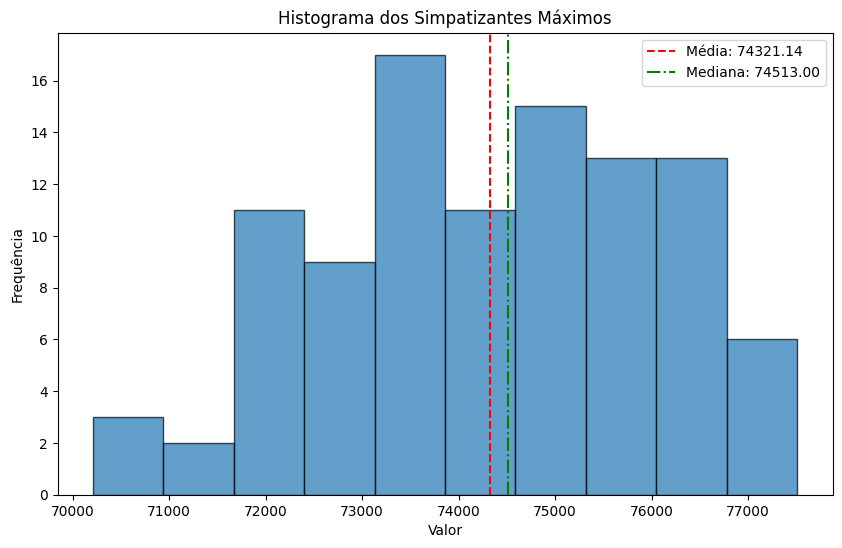

In [12]:
import matplotlib.pyplot as plt
# Calculando a média e a mediana
media = sum(lista_simpatizantes_maximos) / len(lista_simpatizantes_maximos)
mediana = sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2] if len(lista_simpatizantes_maximos) % 2 == 1 else (sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2 - 1] + sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2]) / 2

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(lista_simpatizantes_maximos, bins=10, edgecolor='black', alpha=0.7)

# Adicionando linhas verticais para a média e a mediana
plt.axvline(x=media, color='r', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='g', linestyle='-.', label=f'Mediana: {mediana:.2f}')

# Adicionando título e legendas
plt.title('Histograma dos Simpatizantes Máximos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

In [13]:
print(f"A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a {max(lista_simpatizantes_maximos)}.")

A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a 77510.


### Operador de permutação de linhas

Este operador de mutação realiza permutações entre linhas em cada indivíduo da população com uma certa probabilidade (`chance_de_mutacao`). Embora, como refletimos anteriormente, a permutação de linhas ou colunas não afete o valor final do simpatizante, a introdução desta mutação pode ajudar a ampliar o espaço de busca, potencialmente permitindo ao algoritmo escapar de máximos locais.

Esse operador funciona da seguinte forma:

* Para cada indivíduo na população, a matriz é transformada em uma lista de listas, mantendo a estrutura original das linhas.
* Com base na `chance_de_mutacao`, determinamos se uma mutação deve ocorrer para o indivíduo.
* Se a mutação ocorrer, selecionamos duas linhas aleatórias e as permutamos, garantindo que as linhas selecionadas sejam diferentes.
* A lista de listas é convertida de volta para a forma de matriz.

In [14]:
def algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO):
   
    hall_da_fama =[]
    
    # Criando população
    populacao = cria_populacao(TAMANHO_POPULACAO, ORDEM_DA_MATRIZ)
    
    for geracao in range(NUMERO_GERACOES):
        
        # Avaliando a população
        valores_fitness = funcao_objetivo(populacao)
        
        #hall da fama
        melhor_fitness = max(valores_fitness)
        melhor_individuo = populacao[valores_fitness.index(melhor_fitness)]
        hall_da_fama.append(melhor_individuo)
        
        # Seleção
        selecionados = funcao_selecao(populacao, valores_fitness, TAMANHO_TORNEIO)
        
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
    

        # Substituindo a população pela nova geração
        populacao = proxima_geracao
            
        # Mutação: vamos usar todos, depois descobrireremos o melhor!
        #mutacao_troca1(populacao, CHANCE_DE_MUTACAO)
        #mutacao_troca2(populacao, CHANCE_DE_MUTACAO)
        mutacao_permuta(populacao, CHANCE_DE_MUTACAO)
        #mutacao_inverte(populacao, CHANCE_DE_MUTACAO)

    # Melhor indivíduo ao final de todas as gerações
    valores_fitness = funcao_objetivo(hall_da_fama)
    melhor_fitness_final = max(valores_fitness)
    melhor_individuo_final = hall_da_fama[valores_fitness.index(melhor_fitness_final)]
    
    print(f"Melhor S final = {melhor_fitness_final}")
    print(f"{melhor_individuo_final}")
    
    return(melhor_fitness_final)

In [15]:
lista_simpatizantes_maximos = []
for _ in range(100):
    simpatizante_maximo = algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO)
    lista_simpatizantes_maximos.append(simpatizante_maximo)

Melhor S final = 72582
[[ 5  4 16  6]
 [10  9 13  7]
 [12 11 15  8]
 [ 3  1 14  2]]
Melhor S final = 75059
[[ 6 10  8  2]
 [ 5 11  9  1]
 [ 4 13  7  3]
 [14 16 15 12]]
Melhor S final = 74052
[[ 9 16 12 10]
 [ 6 15  4  5]
 [ 7 14 11  8]
 [ 3 13  2  1]]
Melhor S final = 75986
[[11  6  5  1]
 [10  8  4  3]
 [16 15 13 14]
 [12  9  7  2]]
Melhor S final = 75954
[[ 4  6 12  1]
 [ 2  8 10  3]
 [ 5  9 11  7]
 [15 14 16 13]]
Melhor S final = 76102
[[14  3  5  7]
 [13  1  2  8]
 [16 10 12 11]
 [15  4  6  9]]
Melhor S final = 71039
[[13 12 15 16]
 [ 4  3  1 14]
 [ 8  2  7 10]
 [ 9  6  5 11]]
Melhor S final = 75732
[[15 16 13 14]
 [ 2 10  5  1]
 [ 3 11  9  4]
 [ 6 12  8  7]]
Melhor S final = 75550
[[16 14 12 15]
 [11  5  4  7]
 [10  2  1  8]
 [13  6  3  9]]
Melhor S final = 76678
[[16 14 15 13]
 [10  7  4  2]
 [12  9  6  3]
 [11  8  5  1]]
Melhor S final = 72082
[[ 3 11  8  7]
 [12 16 10 13]
 [ 5 15  9  6]
 [ 1 14  4  2]]
Melhor S final = 75460
[[ 4 13  7  1]
 [ 3 14  5  2]
 [10 15  8  6]
 [11 16 

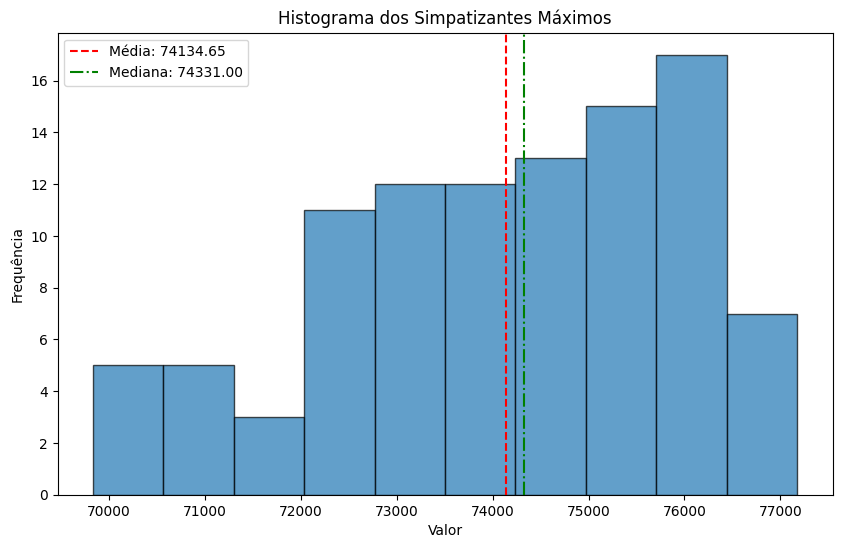

In [16]:
import matplotlib.pyplot as plt
# Calculando a média e a mediana
media = sum(lista_simpatizantes_maximos) / len(lista_simpatizantes_maximos)
mediana = sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2] if len(lista_simpatizantes_maximos) % 2 == 1 else (sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2 - 1] + sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2]) / 2

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(lista_simpatizantes_maximos, bins=10, edgecolor='black', alpha=0.7)

# Adicionando linhas verticais para a média e a mediana
plt.axvline(x=media, color='r', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='g', linestyle='-.', label=f'Mediana: {mediana:.2f}')

# Adicionando título e legendas
plt.title('Histograma dos Simpatizantes Máximos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

In [17]:
print(f"A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a {max(lista_simpatizantes_maximos)}.")

A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a 77177.


### Operador de inversão de linha

Este operador de mutação realiza a inversão de linhas em cada indivíduo da população com uma certa probabilidade (`chance_de_mutacao`). A inversão de linhas consiste em reverter a ordem dos elementos dentro de uma linha específica da matriz.

O operador de mutação de inversão de linhas funciona da seguinte maneira:

* Para cada indivíduo na população, a matriz é transformada em uma lista de listas, mantendo a estrutura original das linhas.
* Com base na `chance_de_mutacao`, determinamos se uma mutação deve ocorrer para o indivíduo.
* Se a mutação ocorrer, selecionamos aleatoriamente uma linha da matriz e a invertemos. Por exemplo, uma linha [1, 2, 3, 4] se tornará [4, 3, 2, 1].
* A lista de listas é convertida de volta para a forma de matriz.

In [26]:
def algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO):
   
    hall_da_fama =[]
    
    # Criando população
    populacao = cria_populacao(TAMANHO_POPULACAO, ORDEM_DA_MATRIZ)
    
    for geracao in range(NUMERO_GERACOES):
        
        # Avaliando a população
        valores_fitness = funcao_objetivo(populacao)
        
        #hall da fama
        melhor_fitness = max(valores_fitness)
        melhor_individuo = populacao[valores_fitness.index(melhor_fitness)]
        hall_da_fama.append(melhor_individuo)
        
        # Seleção
        selecionados = funcao_selecao(populacao, valores_fitness, TAMANHO_TORNEIO)
        
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
    

        # Substituindo a população pela nova geração
        populacao = proxima_geracao
            
        # Mutação: vamos usar todos, depois descobrireremos o melhor!
        #mutacao_troca1(populacao, CHANCE_DE_MUTACAO)
        #mutacao_troca2(populacao, CHANCE_DE_MUTACAO)
        #mutacao_permuta(populacao, CHANCE_DE_MUTACAO)
        mutacao_inverte(populacao, CHANCE_DE_MUTACAO)

    # Melhor indivíduo ao final de todas as gerações
    valores_fitness = funcao_objetivo(hall_da_fama)
    melhor_fitness_final = max(valores_fitness)
    melhor_individuo_final = hall_da_fama[valores_fitness.index(melhor_fitness_final)]
    
    print(f"Melhor S final = {melhor_fitness_final}")
    print(f"{melhor_individuo_final}")
    
    return(melhor_fitness_final)

In [27]:
lista_simpatizantes_maximos = []
for _ in range(100):
    simpatizante_maximo = algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO)
    lista_simpatizantes_maximos.append(simpatizante_maximo)

Melhor S final = 75170
[[16 14 13 15]
 [ 4  2  5 10]
 [ 3  1  6 11]
 [ 9  7  8 12]]
Melhor S final = 74944
[[ 2 11  7  1]
 [ 3  8  9  4]
 [13 15 16 14]
 [ 5 12 10  6]]
Melhor S final = 74711
[[ 7  3 10  2]
 [ 8  4 13  6]
 [ 9  1 11  5]
 [14 12 16 15]]
Melhor S final = 76026
[[11  9  6  2]
 [12  7  4  1]
 [10  8  5  3]
 [15 16 14 13]]
Melhor S final = 76693
[[ 2 11  1  6]
 [ 4 12  3  8]
 [ 7 10  5  9]
 [14 16 13 15]]
Melhor S final = 72874
[[15 12 10  8]
 [14  9  7 11]
 [13  5  4  1]
 [16  6  3  2]]
Melhor S final = 73945
[[10 13 12 16]
 [ 9  6  8 15]
 [ 4  2  7 14]
 [ 3  1  5 11]]
Melhor S final = 77060
[[ 2  1  5 14]
 [ 3  4  7 13]
 [11 10 12 16]
 [ 8  6  9 15]]
Melhor S final = 71782
[[ 7  4 10  9]
 [ 6  2 11  1]
 [ 5  8 13  3]
 [15 14 16 12]]
Melhor S final = 74142
[[12 16 13 15]
 [ 1 11  2  9]
 [ 5 14  4  8]
 [ 3 10  6  7]]
Melhor S final = 74165
[[ 8  7 13  6]
 [ 4  5 11  1]
 [ 2  9 10  3]
 [14 15 16 12]]
Melhor S final = 70314
[[ 5 15  2  4]
 [ 8 10  3  7]
 [ 6 14  1  9]
 [12 16 

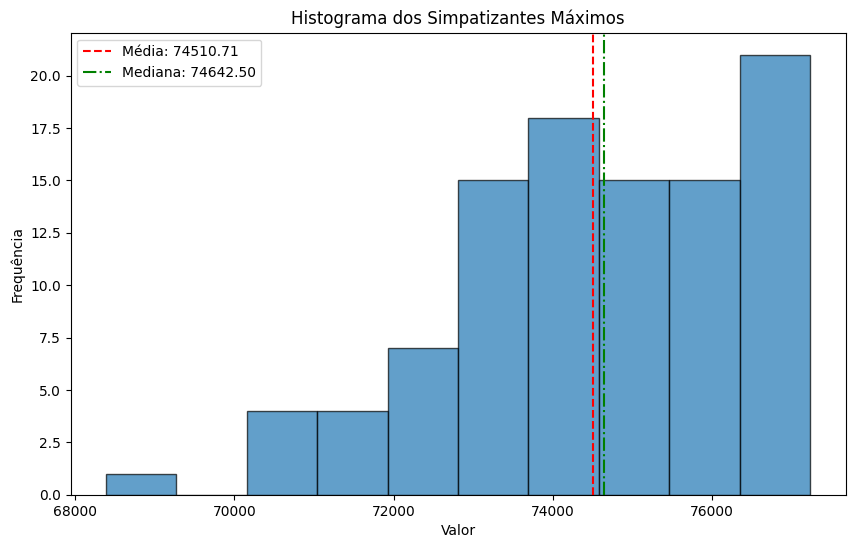

In [28]:
import matplotlib.pyplot as plt
# Calculando a média e a mediana
media = sum(lista_simpatizantes_maximos) / len(lista_simpatizantes_maximos)
mediana = sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2] if len(lista_simpatizantes_maximos) % 2 == 1 else (sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2 - 1] + sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2]) / 2

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(lista_simpatizantes_maximos, bins=10, edgecolor='black', alpha=0.7)

# Adicionando linhas verticais para a média e a mediana
plt.axvline(x=media, color='r', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='g', linestyle='-.', label=f'Mediana: {mediana:.2f}')

# Adicionando título e legendas
plt.title('Histograma dos Simpatizantes Máximos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

In [29]:
print(f"A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a {max(lista_simpatizantes_maximos)}.")

A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a 77237.


### Combinando todos

Mas e se combinarmos todos os operadores de mutação de que desenvolvemos até aqui? O que acontece? Vamos testar!

In [30]:
def algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO):
   
    hall_da_fama =[]
    
    # Criando população
    populacao = cria_populacao(TAMANHO_POPULACAO, ORDEM_DA_MATRIZ)
    
    for geracao in range(NUMERO_GERACOES):
        
        # Avaliando a população
        valores_fitness = funcao_objetivo(populacao)
        
        #hall da fama
        melhor_fitness = max(valores_fitness)
        melhor_individuo = populacao[valores_fitness.index(melhor_fitness)]
        hall_da_fama.append(melhor_individuo)
        
        # Seleção
        selecionados = funcao_selecao(populacao, valores_fitness, TAMANHO_TORNEIO)
        
        # Cruzamento
        proxima_geracao = []
        for pai, mae in zip(selecionados[::2], selecionados[1::2]):
            individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
            proxima_geracao.append(individuo1)
            proxima_geracao.append(individuo2)
    

        # Substituindo a população pela nova geração
        populacao = proxima_geracao
            
        # Mutação: dessa vez utilizaremos todos os operadores de mutação que desenvolvemos
        mutacao_troca1(populacao, CHANCE_DE_MUTACAO)
        mutacao_troca2(populacao, CHANCE_DE_MUTACAO)
        mutacao_permuta(populacao, CHANCE_DE_MUTACAO)
        mutacao_inverte(populacao, CHANCE_DE_MUTACAO)

    # Melhor indivíduo ao final de todas as gerações
    valores_fitness = funcao_objetivo(hall_da_fama)
    melhor_fitness_final = max(valores_fitness)
    melhor_individuo_final = hall_da_fama[valores_fitness.index(melhor_fitness_final)]
    
    print(f"Melhor S final = {melhor_fitness_final}")
    print(f"{melhor_individuo_final}")
    
    return(melhor_fitness_final)

In [31]:
lista_simpatizantes_maximos = []
for _ in range(100):
    simpatizante_maximo = algoritmo_genetico_troca1(ORDEM_DA_MATRIZ, TAMANHO_POPULACAO, NUMERO_GERACOES,
                       TAMANHO_TORNEIO, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO)
    lista_simpatizantes_maximos.append(simpatizante_maximo)

Melhor S final = 74694
[[ 3  9  7  2]
 [ 1 10  8  6]
 [ 4 12 11  5]
 [13 16 15 14]]
Melhor S final = 71900
[[16 14 10 15]
 [12  1  3  2]
 [13  8  9  7]
 [11  5  4  6]]
Melhor S final = 75690
[[ 7  5 14  3]
 [ 4  2 13  1]
 [ 8  9 16  6]
 [11 12 15 10]]
Melhor S final = 74580
[[13 14 16 15]
 [ 7  9 11  8]
 [ 1  3 10  4]
 [ 6  5 12  2]]
Melhor S final = 71704
[[ 9  8 13 12]
 [ 4  1 16  5]
 [ 3  2 15  6]
 [10  7 14 11]]
Melhor S final = 74370
[[ 6  7 14  5]
 [ 1 10 13  3]
 [11 12 16  9]
 [ 2  8 15  4]]
Melhor S final = 76327
[[ 7 14  4  2]
 [ 5 13  3  1]
 [ 9 16  8  6]
 [12 15 11 10]]
Melhor S final = 76363
[[ 8  7  9 12]
 [ 1  5  3 11]
 [ 2  6  4 10]
 [13 15 14 16]]
Melhor S final = 75220
[[16 12 14 15]
 [13  8  9  6]
 [10  4  5  1]
 [11  3  7  2]]
Melhor S final = 75336
[[15 16 14 13]
 [12  9  2  3]
 [11  6  1  4]
 [10  8  5  7]]
Melhor S final = 73079
[[16 13 14 12]
 [10  1  6  2]
 [15  3  9  4]
 [11  5  8  7]]
Melhor S final = 72568
[[ 4  1  7  5]
 [ 3  2  8  6]
 [15 14 16 13]
 [ 9 11 

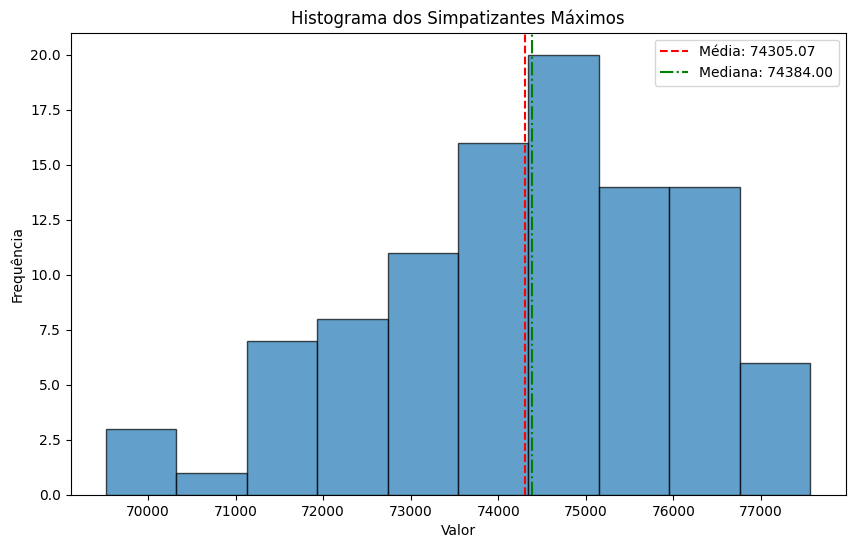

In [32]:
import matplotlib.pyplot as plt
# Calculando a média e a mediana
media = sum(lista_simpatizantes_maximos) / len(lista_simpatizantes_maximos)
mediana = sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2] if len(lista_simpatizantes_maximos) % 2 == 1 else (sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2 - 1] + sorted(lista_simpatizantes_maximos)[len(lista_simpatizantes_maximos) // 2]) / 2

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(lista_simpatizantes_maximos, bins=10, edgecolor='black', alpha=0.7)

# Adicionando linhas verticais para a média e a mediana
plt.axvline(x=media, color='r', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(x=mediana, color='g', linestyle='-.', label=f'Mediana: {mediana:.2f}')

# Adicionando título e legendas
plt.title('Histograma dos Simpatizantes Máximos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()

# Exibindo o gráfico
plt.show()

In [33]:
print(f"A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a {max(lista_simpatizantes_maximos)}.")

A simpática-rainha mais simpática gerada dentre todas as gerações teve o valor do simpatizante igual a 77562.


_________________________________________________________________________________________________________________
### Conclusão

Podemos observar que, apesar de alguns operadores se mostrarem melhores que outros, e a combinação de todos eles ter apresentado o melhor resultado final, a diferença entre o simpatizante máximo, a média e a mediana de cada um dos operadores não foi significativamente relevante.

Algumas hipóteses foram formuladas para resolver esse impasse. A primeira é que, possivelmente, uma população inicial maior e um maior número de gerações poderiam produzir um resultado melhor e talvez até convergir com mais rapidez. Além disso, outros parâmetros podem ser alterados, como a chance de cruzamento e a chance de mutação.

Outra questão é que, ao utilizar o cruzamento ordenado durante o desenvolvimento deste notebook, notamos que ele não estava dando bons resultados e frequentemente caía em máximos locais. Utilizar o cruzamento de ponto simples com correção melhorou esse problema, mas talvez seja interessante testar outros tipos de cruzamento e observar se nosso algoritmo converge mais rapidamente e resulta em melhores valores para o simpatizante.

Propomos, portanto, como perspectivas futuras, testar essas hipóteses e utilizar diferentes métodos a fim de verificar se otimizamos nosso algoritmo, além de testá-lo em matrizes com valores de $n$ maiores e observar como o simpatizante se comporta.

_________________________________________________________________________________________________________________
## OBMEP 2025: QUESTÃO BÔNUS

Daniel tem $2025$ números (1,2,3,...2024,2025) para organizar em uma matriz $45 \times 45$. Qual matriz será a mais simpática?

_________________________________________________________________________________________________________________
#### Obrigada por ler até aqui, você foi muito simpático!
_________________________________________________________________________________________________________________

### Referências

[1] Cassar, Daniel. Material Didático do Curso de Redes Neurais e Algoritimos Genéticos. Ilum - Escola de Ciência, 2024.

[2] NUMPY. Documentação oficial. Disponível em: https://numpy.org/. Acesso em: 03 jun. 2024

[3] OBMEP. Provas Passadas. Disponível em: https://www.obmep.org.br/provas.htm. Acesso em: 03 jun. 2024